In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font',family='Comic Sans MS')

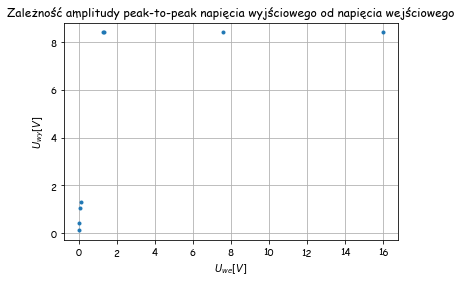

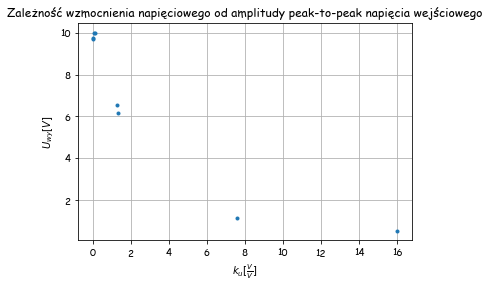

In [16]:
daneUodU = pd.read_csv('UodU.csv')
Uwe = daneUodU['Uwe[V]']
Uwy = daneUodU['Uwy[V]']
deltaUwe = Uwe*0.03
deltaUwy = Uwy*0.03
plt.plot(Uwe, Uwy,'.')
plt.title('Zależność amplitudy peak-to-peak napięcia wyjściowego od napięcia wejściowego')
plt.xlabel(r'$U_{we}[V]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('UodU.png')
plt.show()
k_u = Uwy/Uwe
plt.plot(Uwe, k_u,'.')
plt.title('Zależność wzmocnienia napięciowego od amplitudy peak-to-peak napięcia wejściowego')
plt.xlabel(r'$k_u[\frac{V}{V}]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('kodU.png')

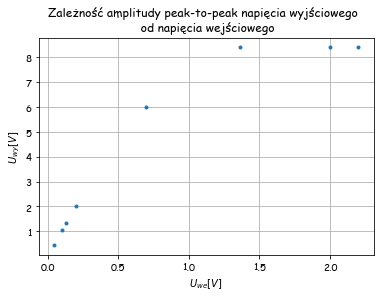

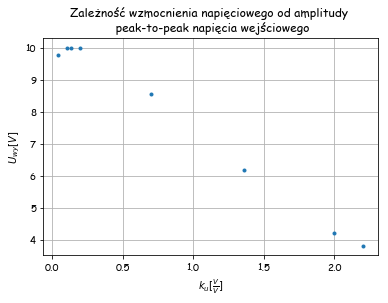

In [23]:
daneUodU = pd.read_csv('UodUmieszane.csv')
Uwe = daneUodU['Uwe[V]']
Uwy = daneUodU['Uwy[V]']
deltaUwe = Uwe*0.03
deltaUwy = Uwy*0.03
plt.plot(Uwe, Uwy,'.')
plt.title('Zależność amplitudy peak-to-peak napięcia wyjściowego  \n od napięcia wejściowego')
plt.xlabel(r'$U_{we}[V]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('UodU.png')
plt.show()
k_u = Uwy/Uwe
plt.plot(Uwe, k_u,'.')
plt.title('Zależność wzmocnienia napięciowego od amplitudy \n peak-to-peak napięcia wejściowego')
plt.xlabel(r'$k_u[\frac{V}{V}]$')
plt.ylabel(r'$U_{wy}[V]$')
plt.grid()
# plt.savefig('kodU.png')